# Principle Component Analysis Applied to the Stock Market
### https://github.com/gylx/Financial-Machine-Learning-Articles 
### https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests
import fs

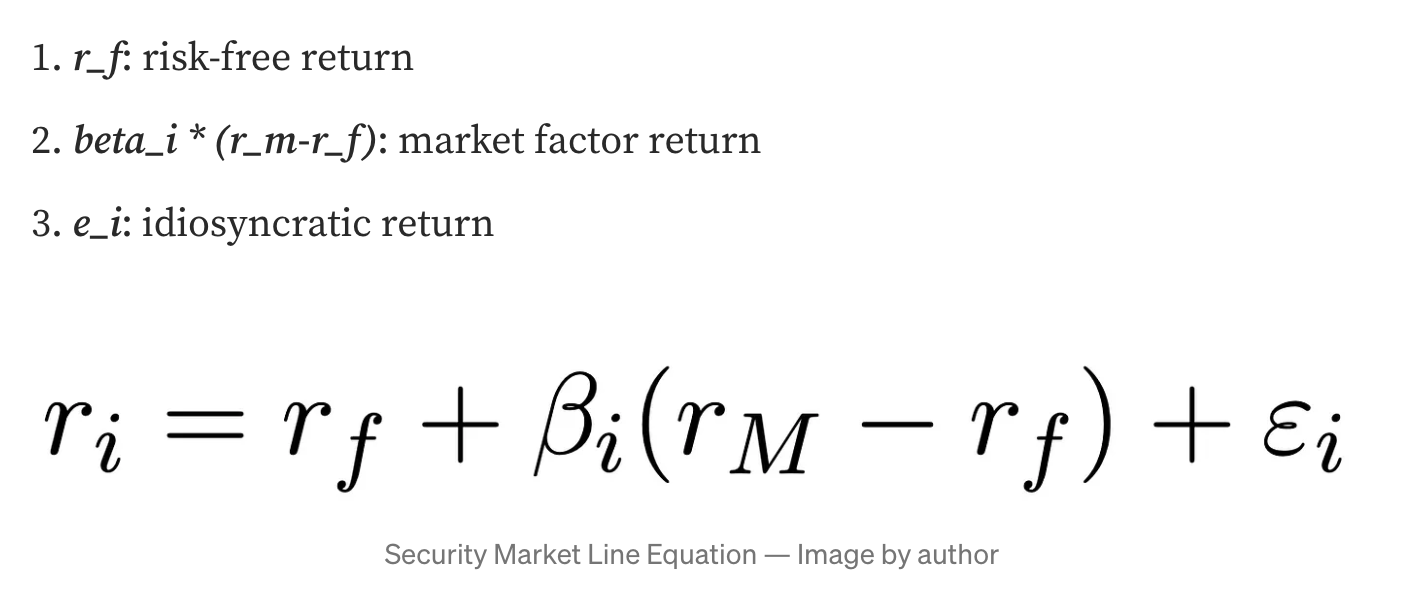

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
tickers = "AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,AXP,BA,BAC,BIIB,BK,BLK,BMY,C,CAT,CELG,CL,CMCSA,COF,COP,COST,CSCO,CVS,CVX,DD,DHR,DIS,DOW,DUK,EMC,EMR,EXC,F,FB,FDX,FOX,FOXA,GD,GE,GILD,GM,GOOG,GOOGL,GS,HAL,HD,HON,IBM,INTC,JNJ,JPM,KMI,KO,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,MMM,MO,MON,MRK,MS,MSFT,NEE,NKE,ORCL,OXY,PCLN,PEP,PFE,PG,PM,PYPL,QCOM,RTN,SBUX,SLB,SO,SPG,T,TGT,TWX,TXN,UNH,UNP,UPS,USB,USD,UTX,V,VZ,WBA"
tickers = tickers.split(',')
print(tickers)

['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG', 'ALL', 'AMGN', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CELG', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMC', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'FOX', 'FOXA', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PCLN', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTN', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TWX', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'USD', 'UTX', 'V', 'VZ', 'WBA']


In [4]:
#prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 
# write to csv file



In [5]:
# write prices to csv file
#prices.to_csv('prices.csv') 
# read prices from csv file
prices = pd.read_csv('prices.csv', index_col=0)

In [36]:
# daily returns - Remember rs is the log returns
rs = prices.apply(np.log).diff(1)

#### Why take log of returns? 
#### Simple returns are not symmetric: positive and negative percent ordinary returns of equal magnitude do not cancel each other out and result in a net change. For example, if your portfolio goes up by 50%
 (say from $100
 to $150
) and then declines by 50%
 (say from $150
 to $75
), you’re not back where you started. If you calculate your average percentage return (in this case, 0%
), that’s not a particularly useful summary of the fact that you actually ended up 25%
 below where you started.Simple returns are not symmetric: positive and negative percent ordinary returns of equal magnitude do not cancel each other out and result in a net change. For example, if your portfolio goes up by 50%
 (say from $100
 to $150
) and then declines by 50%
 (say from $150
 to $75
), you’re not back where you started. If you calculate your average percentage return (in this case, 0%
), that’s not a particularly useful summary of the fact that you actually ended up 25%
 below where you started.Simple returns are not symmetric: positive and negative percent ordinary returns of equal magnitude do not cancel each other out and result in a net change. For example, if your portfolio goes up by 50%
 (say from $100
 to $150
) and then declines by 50%
 (say from $150
 to $75
), you’re not back where you started. If you calculate your average percentage return (in this case, 0%
), that’s not a particularly useful summary of the fact that you actually ended up 25%
 below where you started.

#### This means that an investment of $100
 that yields a simple return of 50%
 followed by a simple return of −50%
 will result in $75
, while an investment of $100
 that yields a logarithmic return of 50%
 followed by a logarithmic return of −50%
 will come back to $100
.

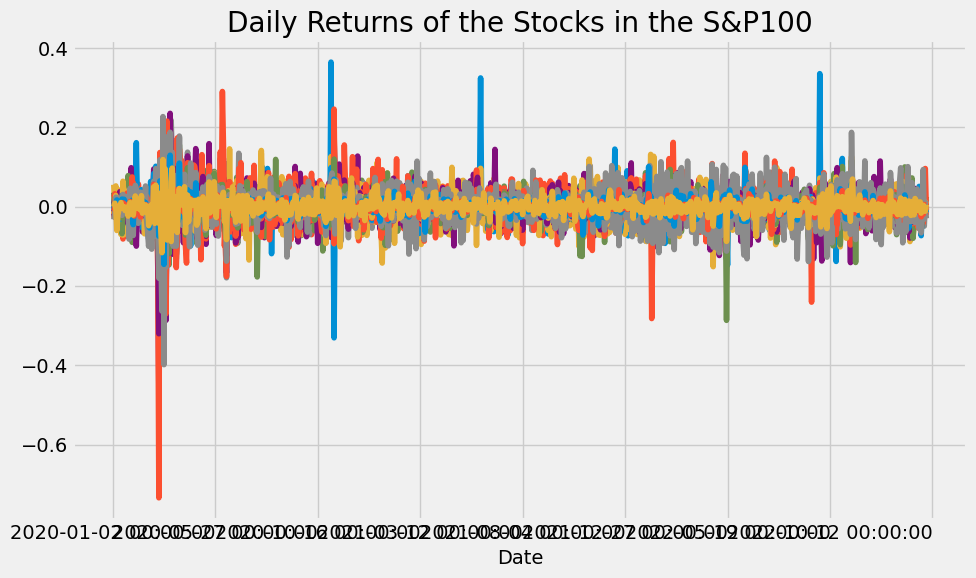

In [7]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P100')
plt.tight_layout()
plt.savefig('tmp.png')

#### so for total return we sum the logs and then take exponential

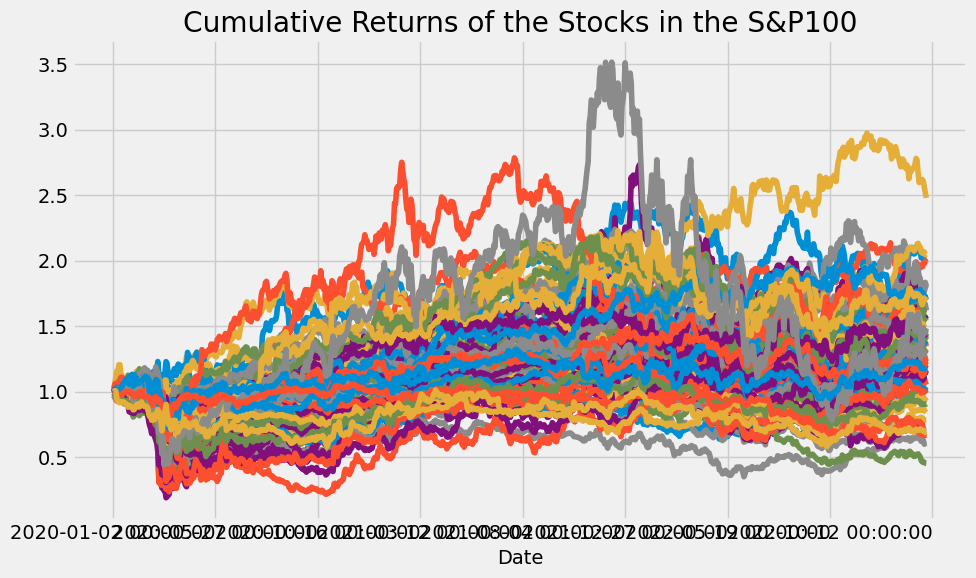

In [8]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P100')
plt.tight_layout()
plt.savefig('tmp.png')

In [9]:
# note that this needs a pip install scikit-learn
import sklearn.decomposition as skd


#### Round the datetime to the nearest day 

In [37]:
print(rs.shape) # 795 time steps, and 99 stocks
print(rs.columns) # the names of the stocks
# change date in index to nearest day 
rs.index


(795,)


AttributeError: 'Series' object has no attribute 'columns'

In [28]:

pca = skd.PCA(1).fit(rs.fillna(0))
print(type(pca))
print(pca.explained_variance_ratio_)
type(pca.components_)

<class 'sklearn.decomposition._pca.PCA'>
[0.50064748]


numpy.ndarray

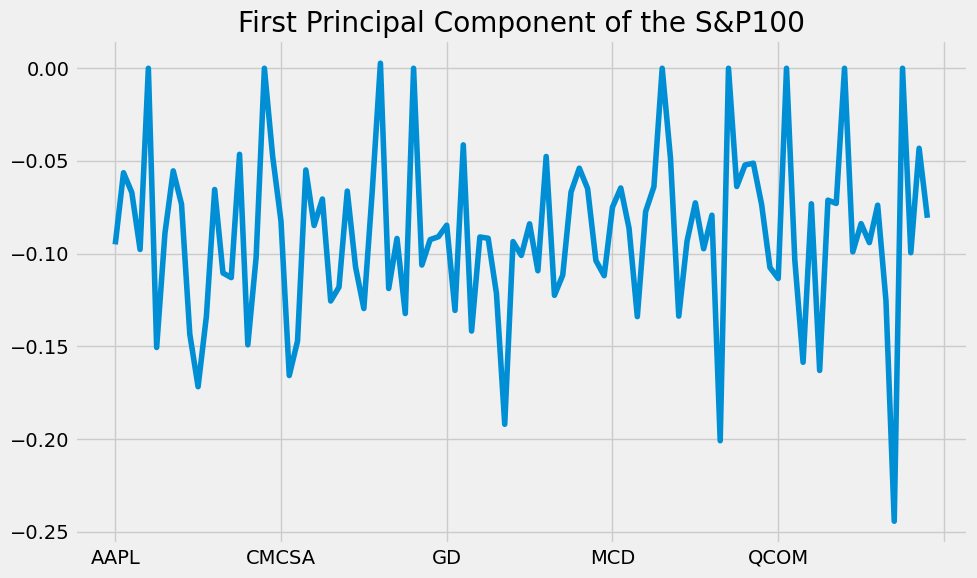

In [29]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6),  grid=True, title='First Principal Component of the S&P100')
plt.tight_layout()
plt.savefig('tmp.png')

#### Note that (1) the first principal component represents the linear combination of the input data that explains most of the variance, and (2) the primary driver of stock returns is the overall market factor. This implies that if we formulate a portfolio of stocks by allocating the cash proportionally to the 1st principal component (i.e. linear combination of the input data), we can replicate the returns of the S&P500 approximately (i.e. the primary driver of stock returns).

<Axes: title={'center': 'Cumulative Returns of the PCA'}, xlabel='Date'>

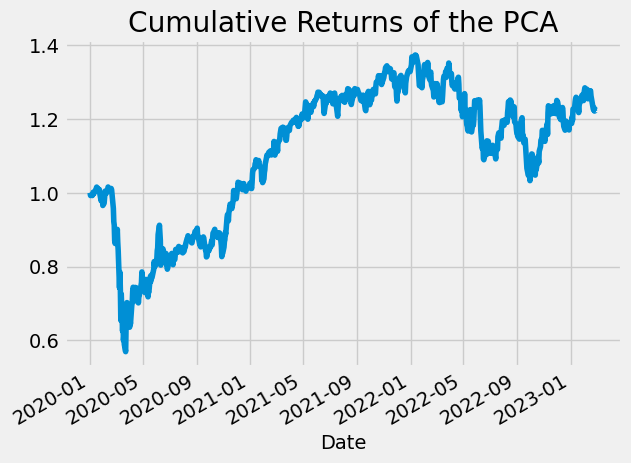

In [30]:
# weights of the stocks in the first principal component - normalize to sum to 1
weights = abs(pc1)/sum(abs(pc1))  # l1 norm
myrs = (weights*rs).sum(1) # the returns of the portfolio
myrs.cumsum().apply(np.exp).plot(title='Cumulative Returns of the PCA')

# this is the total return of the principal component - it is the same as the total return of the portfolio

In [31]:
# SPY captures/tracks S&P 500
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 


[*********************100%***********************]  1 of 1 completed


In [16]:
prices.head()

Date
2020-01-02    309.694855
2020-01-03    307.349823
2020-01-06    308.522369
2020-01-07    307.654907
2020-01-08    309.294586
Name: Adj Close, dtype: float64

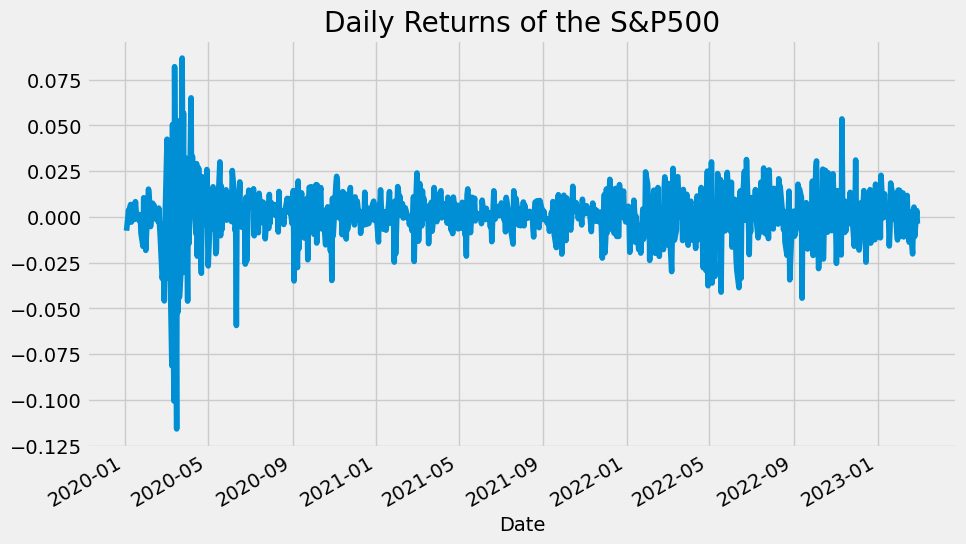

<Axes: title={'center': 'Daily Returns of the PCA Portfolio'}, xlabel='Date'>

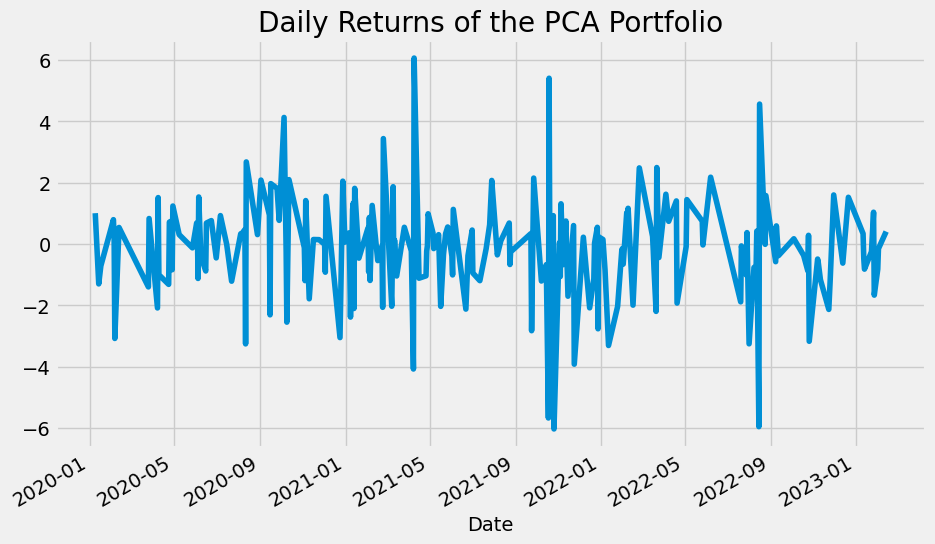

In [32]:
# prices = SPY data
# fix up this plotting in class 

market_rs = prices.apply(np.log).diff(1)
#plot market returns
market_rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the S&P500')
#plot  cumulative market returns
plt.show()
my_rs = myrs.apply(np.log).diff(1).dropna()
my_rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the PCA Portfolio')


#rs_df = pd.concat([myrs,market_rs], 1) 





/tmp/ipykernel_1175/554690394.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  rs_df = pd.concat([myrs, market_rs], 1)


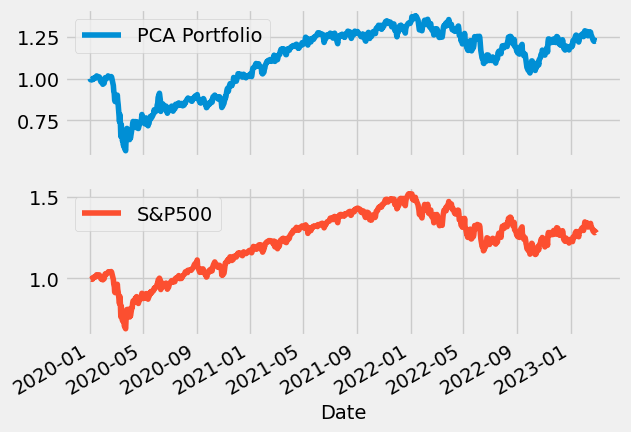

In [33]:
weights = abs(pc1)/sum(abs(pc1)) # l1norm = 1
myrs = (weights*rs).sum(1)
rs_df = pd.concat([myrs, market_rs], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]
crs_df = rs_df.cumsum().apply(np.exp)
crs_df.plot(subplots=True);

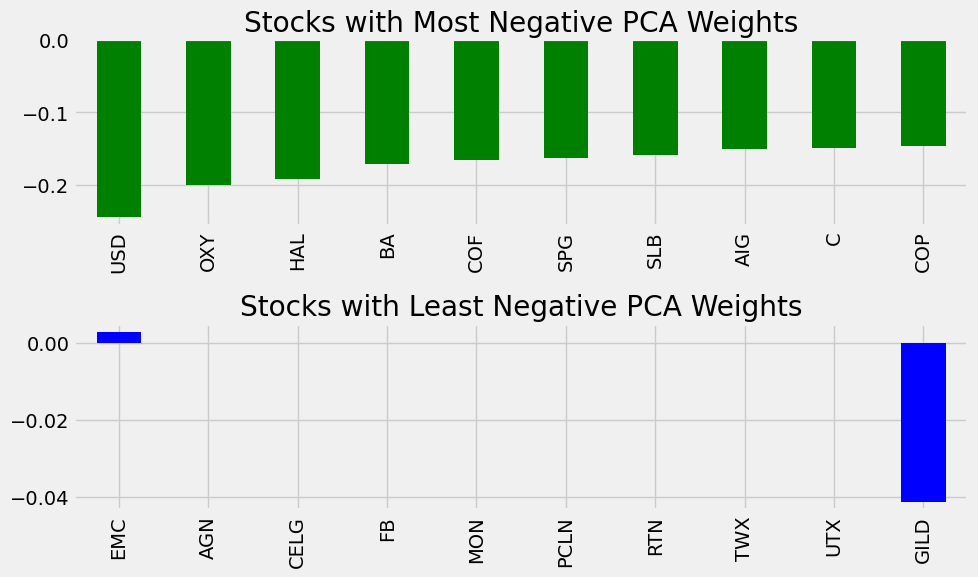

In [20]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

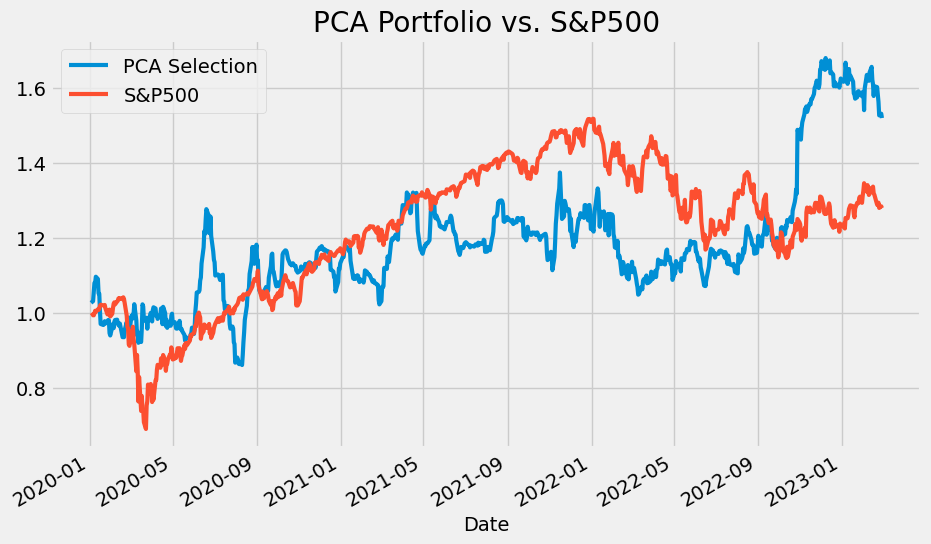

In [34]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

#plt.tight_layout()
plt.savefig('tmp.png')